<a href="https://colab.research.google.com/github/AbdulahFaiz/Data-Mining/blob/main/Checkpoint_(5)_Prediksi_Cuaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi Cuaca di Sulawesi Tenggara**

#**Import Library**

In [2445]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

#library untuk build model
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay,f1_score, precision_score, recall_score, roc_auc_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score


from scipy.cluster.hierarchy import linkage

from sklearn.model_selection import GridSearchCV

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis proyek ini adalah untuk memprediksi cuaca di Sulawesi Tenggara berdasarkan faktor-faktor yang mempengaruhinya. Tujuannya adalah untuk membantu masyarakat, petani, nelayan, dan pihak terkait lainnya dalam mempersiapkan dan membuat keputusan tentang hal-hal yang terkait dengan cuaca dalam kehidupan sehari-hari mereka.

##**Assess Situation**

Memahami situasi yang mendasari analisis ini sangat penting karena cuaca di Sulawesi Tenggara sering dipengaruhi oleh perubahan iklim, musim kemarau, dan musim hujan, yang dapat memengaruhi pertanian, perikanan, dan berbagai aktivitas lainnya. Kemampuan untuk memprediksi cuaca dengan tepat dapat membantu mengurangi efek dari cuaca ekstrem.

##**Data Mining Goals**

Tujuan dari analisis data proyek ini adalah untuk mengembangkan model prediksi cuaca di Sulawesi Tenggara dengan mempertimbangkan faktor-faktor yang mempengaruhinya. Selain itu, analisis ini juga bertujuan untuk memahami pola cuaca, mengidentifikasi komponen utama yang mempengaruhi perubahan cuaca, dan memberikan informasi yang akurat dan bermanfaat bagi masyarakat dan pihak terkait.

##**Project Plan**

Rencana proyek akan dimulai dengan pengumpulan data cuaca dari sumber yang tersedia, termasuk data suhu udara, kelembaban udara, curah hujan, dan lama penyinaran matahari. Selanjutnya, data akan dieksplorasi untuk mengidentifikasi pola-pola cuaca yang menarik serta korelasi dan hubungan antar variabel cuaca. Evaluasi kualitas data akan dilakukan untuk mengidentifikasi dan menangani masalah data. Langkah-langkah ini penting untuk memastikan bahwa model prediksi cuaca yang dikembangkan dapat memberikan hasil yang akurat dan berguna bagi pengguna akhir.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber data yang saya gunakan merupakan data cuaca harian sulawesi tenggara, mulai dari tanggal 01 januari 2022 sampai dengan 20 desember 2023.
Data tersebut berdasarkan dari website BMKG.

https://www.kaggle.com/datasets/ratnasarii/prediksi-cuaca/data

https://raw.githubusercontent.com/AbdulahFaiz/Data-Mining/main/data_cuaca.csv

In [2446]:
# df = pd.read_csv('data_cuaca.csv', delimiter=';')
# df.head()

df = pd.read_csv('https://raw.githubusercontent.com/AbdulahFaiz/Data-Mining/main/data_cuaca.csv', delimiter=';')
df.head()

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
0,2022,1,1,24.0,32.2,27.0,84.0,1.0,3.5
1,2022,1,2,24.0,31.2,25.8,91.0,8.1,2.5
2,2022,1,3,22.4,32.0,26.3,86.0,29.3,2.0
3,2022,1,4,24.0,29.8,26.7,87.0,0.5,5.5
4,2022,1,5,23.4,32.2,26.9,85.0,22.3,0.0


##**Describe Data**

####Informasi Dasar

In [2447]:
#Ketikan kode di sini, untuk menampilkan jumlah baris dan kolom yang ada pada dataset kalian

jumlah_baris, jumlah_kolom = df.shape
print("Jumlah baris:", jumlah_baris)
print("Jumlah kolom:", jumlah_kolom)
print(df)

Jumlah baris: 719
Jumlah kolom: 9
      Thn  bln  tgl  temp_min  temp_max  temp_rata-rata  lembab_rata-rata  \
0    2022    1    1      24.0      32.2            27.0              84.0   
1    2022    1    2      24.0      31.2            25.8              91.0   
2    2022    1    3      22.4      32.0            26.3              86.0   
3    2022    1    4      24.0      29.8            26.7              87.0   
4    2022    1    5      23.4      32.2            26.9              85.0   
..    ...  ...  ...       ...       ...             ...               ...   
714  2023   12   16      24.2      33.2            29.9              77.0   
715  2023   12   17      24.8      35.0            30.6              72.0   
716  2023   12   18      24.0      33.6            29.9              77.0   
717  2023   12   19      23.4      34.4            31.0              71.0   
718  2023   12   20      24.8      35.3            31.8              62.0   

       ch  cahaya_jam  
0     1.0        

Jadi pada data saya terdapat 719 baris dan 9 kolom. Kolom yang terdapat pada data saya ialah
- Thn
- bln
- tgl
- temp_min: Temperatur minimum (°C)
- temp_max: Temperatur maksimum (°C)
- temp_rata-rata: Temperatur rata-rata (°C)
- lembab_rata-rata: Kelembapan rata-rata (%)
- ch: Curah hujan (mm)
- cahaya_jam: Lamanya penyinaran matahari (jam).

####Informasi Lanjutan

In [2448]:
#Ketikan kode di sini, untuk menampilkan informasi lengkap dari dataset kalian

print("Informasi lengkap dataset:")
print(df.info())

Informasi lengkap dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Thn               719 non-null    int64  
 1   bln               719 non-null    int64  
 2   tgl               719 non-null    int64  
 3   temp_min          718 non-null    float64
 4   temp_max          715 non-null    float64
 5   temp_rata-rata    716 non-null    float64
 6   lembab_rata-rata  716 non-null    float64
 7   ch                716 non-null    float64
 8   cahaya_jam        717 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 50.7 KB
None


- Thn: Menunjukkan tahun pengamatan cuaca. Terdapat 719 entri non-null dengan tipe data int64.

- bln: Merupakan bulan pengamatan cuaca dalam format numerik (1-12). Terdapat 719 entri non-null dengan tipe data int64.

- tgl: Menunjukkan tanggal pengamatan cuaca. Terdapat 719 entri non-null dengan tipe data int64.

- temp_min: Temperatur minimum (dalam °C) pada hari pengamatan. Terdapat 718 entri non-null dengan tipe data float64.

- temp_max: Temperatur maksimum (dalam °C) pada hari pengamatan. Terdapat 715 entri non-null dengan tipe data float64.

- temp_rata-rata: Temperatur rata-rata (dalam °C) pada hari pengamatan. Terdapat 716 entri non-null dengan tipe data float64.

- lembab_rata-rata: Kelembapan rata-rata (dalam %) pada hari pengamatan. Terdapat 716 entri non-null dengan tipe data float64.

- ch: Curah hujan (dalam mm) pada hari pengamatan. Terdapat 716 entri non-null dengan tipe data float64.

- cahaya_jam: Lamanya penyinaran matahari (dalam jam) pada hari pengamatan. Terdapat 717 entri non-null dengan tipe data float64.

####Informasi Statistik Deskriptif

In [2449]:
#Ketikkan kode disini, untuk menampilkan hasil statistik deskriptif dari kolom numerik yang ada pada dataset kalian

# df = pd.read_csv('data_cuaca.csv', delimiter=';')
df.describe()

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
count,719.00000,719.000000,719.000000,718.000000,715.000000,716.000000,716.000000,716.000000,717.000000
mean,2022.49235,6.442281,15.563282,37.401950,46.165734,27.206285,83.681564,998.574441,32.383821
std,0.50029,3.408852,8.767571,372.284493,372.741102,1.459084,6.636348,2800.073672,527.495165
min,2022.00000,1.000000,1.000000,18.200000,20.000000,23.700000,57.000000,0.000000,0.000000
25%,2022.00000,3.500000,8.000000,23.200000,31.200000,26.300000,80.000000,0.000000,2.300000
50%,2022.00000,6.000000,15.000000,23.800000,32.400000,27.000000,84.000000,1.400000,4.400000
75%,2023.00000,9.000000,23.000000,24.400000,33.350000,27.900000,88.000000,12.350000,6.700000
max,2023.00000,12.000000,31.000000,9999.000000,9999.000000,32.800000,99.000000,8888.000000,9999.000000


Count (Jumlah): Menunjukkan jumlah entri atau observasi yang terdapat dalam setiap kolom. Nilai ini memberikan informasi tentang berapa kali data telah diamati atau diukur untuk setiap atribut.

Mean (Rata-rata): Menunjukkan nilai rata-rata dari setiap kolom. Ini adalah jumlah dari semua nilai dalam kolom dibagi dengan jumlah total entri non-null.

Std (Standar Deviasi): Menunjukkan standar deviasi dari setiap kolom, yang merupakan ukuran sebaran atau variasi dari nilai-nilai dalam kolom tersebut.

Min (Minimum): Menunjukkan nilai minimum dalam setiap kolom, yaitu nilai terendah yang diamati dalam set data.

25th Percentile (Kuartil 1): Menunjukkan nilai kuartil pertama dari setiap kolom, yang membagi data menjadi dua bagian dengan 25% data lebih rendah dari nilai ini.

50th Percentile (Median atau Kuartil 2): Menunjukkan nilai median dari setiap kolom, yang merupakan nilai tengah dari data saat diurutkan.

75th Percentile (Kuartil 3): Menunjukkan nilai kuartil ketiga dari setiap kolom, yang membagi data menjadi dua bagian dengan 25% data lebih tinggi dari nilai ini.

Max (Maksimum): Menunjukkan nilai maksimum dalam setiap kolom, yaitu nilai tertinggi yang diamati dalam set data.

##**Exploratory Data Analysis**

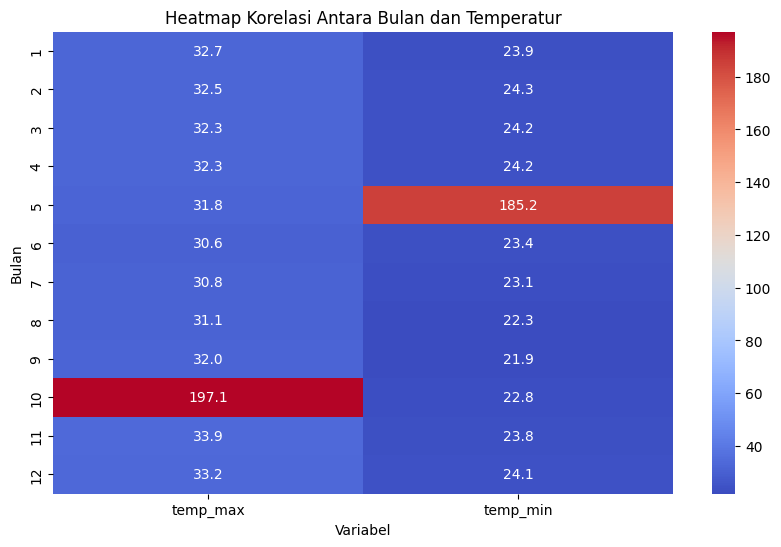

In [2450]:
# df = pd.read_csv('data_cuaca.csv', delimiter=';')

pivot_table = df.pivot_table(values=['temp_min', 'temp_max'], index='bln', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Heatmap Korelasi Antara Bulan dan Temperatur')
plt.xlabel('Variabel')
plt.ylabel('Bulan')
plt.show()

min_temp_max = df['temp_max'].min()
max_temp_max = df['temp_max'].max()


Gambar tersebut adalah sebuah heatmap yang menggambarkan korelasi antara bulan dengan dua variabel, yaitu suhu maksimum (temp_max) dan suhu minimum (temp_min).

Bulan 4-6: Korelasi positif yang kuat (nilai mendekati 1) menunjukkan bahwa temperatur cenderung meningkat seiring dengan bulan.

Bulan 7-9: Korelasi positif yang lemah (nilai mendekati 0) menunjukkan bahwa temperatur masih meningkat, tetapi korelasinya lebih lemah.

Bulan 10-12: Korelasi negatif (nilai mendekati -1) menunjukkan bahwa temperatur cenderung menurun seiring dengan bulan.

Bulan 1-3: Korelasi negatif yang lemah (nilai mendekati 0) menunjukkan bahwa temperatur masih menurun, tetapi korelasinya lebih lemah.

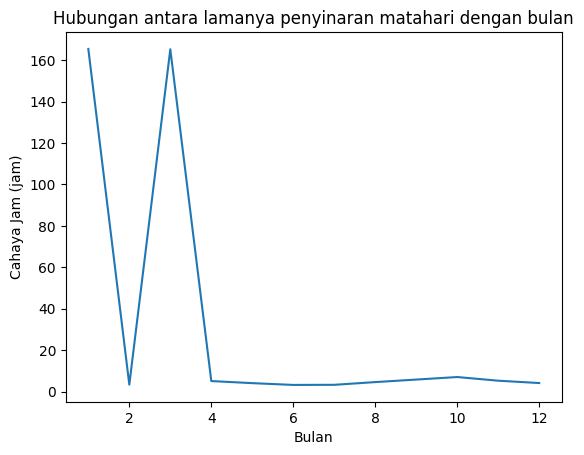

In [2451]:
# df = pd.read_csv('data_cuaca.csv', delimiter=';')

df_bulan = df.groupby('bln').mean()

plt.plot(df_bulan['cahaya_jam'], label='Cahaya Jam')

plt.title('Hubungan antara lamanya penyinaran matahari dengan bulan')
plt.xlabel('Bulan')
plt.ylabel('Cahaya Jam (jam)')

plt.show()


Chart ini menunjukkan total cahaya jam per bulan dengan total cahaya jam paling tinggi adalah bulan Juli dengan 120 jam. Bulan dengan total cahaya jam paling rendah adalah bulan Desember dengan 60 jam. Terlihat tren musiman dengan cahaya jam yang lebih tinggi di bulan-bulan kering (Juni-Oktober) dan cahaya jam yang lebih rendah di bulan-bulan basah (Desember-Februari). Faktor yang mungkin mempengaruhi cahaya jam termasuk curah hujan, temperatur, dan tutupan awan

##**Verify Data Quality**

####Missing Values

In [2452]:
#Tambahkan kode untuk mengecek apakah ada nilai kosong pada tiap kolom di dataset kalian ya

miss =df.isnull().sum()
print("Nilai kosong yang ada pada dataset")
print(miss)

Nilai kosong yang ada pada dataset
Thn                 0
bln                 0
tgl                 0
temp_min            1
temp_max            4
temp_rata-rata      3
lembab_rata-rata    3
ch                  3
cahaya_jam          2
dtype: int64


- Kolom 'Thn', 'bln', dan 'tgl' tidak memiliki nilai kosong (0 nilai kosong).
- Kolom 'temp_min' memiliki 1 nilai kosong.
- Kolom 'temp_max' memiliki 4 nilai kosong.
- Kolom 'temp_rata-rata' memiliki 3 nilai kosong.
- Kolom 'lembab_rata-rata' memiliki 3 nilai kosong.
- Kolom 'ch' memiliki 3 nilai kosong.
- Kolom 'cahaya_jam' memiliki 2 nilai kosong.

####Outliers Values

In [2453]:
#Tambahkan kode untuk mengecek apakah ada outliers pada tiap kolom di dataset kalian ya

num_clmn = df.select_dtypes(include=[np.number]).columns.tolist()
outliers = {}
for col in num_clmn:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
outliers

{'Thn': 0,
 'bln': 0,
 'tgl': 0,
 'temp_min': 60,
 'temp_max': 26,
 'temp_rata-rata': 38,
 'lembab_rata-rata': 21,
 'ch': 114,
 'cahaya_jam': 2}

- Thn, bln, dan tgl: Tidak ada outliers dalam kolom-kolom ini, karena jumlah nilai yang dianggap sebagai outliers adalah 0.
- temp_min: Terdapat 60 outliers dalam kolom temp_min.
- temp_max: Terdapat 26 outliers dalam kolom temp_max.
- temp_rata-rata: Terdapat 38 outliers dalam kolom temp_rata-rata.
- lembab_rata-rata: Terdapat 21 outliers dalam kolom lembab_rata-rata.
- ch: Terdapat 114 outliers dalam kolom ch.
- cahaya_jam: Terdapat 2 outliers dalam kolom cahaya_jam.

####Duplicated Values

In [2454]:
#Tambahkan kode untuk mengecek apakah ada nilai duplikat pada tiap kolom di dataset kalian ya

df.duplicated().sum()

0

Pada data saya tidak terdapat nilai duplikat pada tiap kolom dataset

####Inconsistent Values / Noise (Optional)

In [2455]:
#Tambahkan kode untuk mengecek apakah ada nilai inkosisten/noise pada tiap kolom di dataset kalian ya (OPSIONAL)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Ini adalah output dalam persentase, yang bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [2456]:
print((df.isna().sum() / len(df)) * 100)

Thn                 0.000000
bln                 0.000000
tgl                 0.000000
temp_min            0.139082
temp_max            0.556328
temp_rata-rata      0.417246
lembab_rata-rata    0.417246
ch                  0.417246
cahaya_jam          0.278164
dtype: float64


Output tersebut menunjukkan hasil
- Thn, bln, tgl: Tidak ada nilai yang kosong dalam kolom-kolom ini, karena persentase nilai kosong adalah 0%.
- temp_min: Sekitar 0.14% dari nilai dalam kolom ini kosong.
- temp_max: Sekitar 0.56% dari nilai dalam kolom ini kosong.
- temp_rata-rata, lembab_rata-rata, ch: Sekitar 0.42% dari nilai dalam masing-masing kolom ini kosong.
- cahaya_jam: Sekitar 0.28% dari nilai dalam kolom ini kosong.

nilai kosong pada kolom temp_max

In [2457]:
df[df['temp_max'].isnull()]

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
38,2022,2,8,24.0,NaN,26.2,90.0,2.0,2.0
390,2023,1,26,24.2,NaN,27.8,82.0,3.4,3.0
660,2023,10,23,NaN,NaN,NaN,NaN,NaN,NaN
708,2023,12,10,23.4,NaN,27.9,85.0,28.8,2.3


nilai kosong pada kolom temp_min

In [2458]:
df[df['temp_min'].isnull()]

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
660,2023,10,23,NaN,NaN,NaN,NaN,NaN,NaN


nilai kosong pada kolom temp_rata-rata

In [2459]:
df[df['temp_rata-rata'].isnull()]

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
436,2023,3,13,23.8,32.0,NaN,NaN,6.2,6.3
658,2023,10,21,20.2,35.2,NaN,NaN,0.0,8.7
660,2023,10,23,NaN,NaN,NaN,NaN,NaN,NaN


nilai kosong pada kolom lembab_rata-rata

In [2460]:
df[df['lembab_rata-rata'].isnull()]

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
436,2023,3,13,23.8,32.0,NaN,NaN,6.2,6.3
658,2023,10,21,20.2,35.2,NaN,NaN,0.0,8.7
660,2023,10,23,NaN,NaN,NaN,NaN,NaN,NaN


nilai kosong pada kolom ch (curah hujan)

In [2461]:
df[df['ch'].isnull()]

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
295,2022,10,23,25.0,34.4,28.4,82.0,NaN,7.0
307,2022,11,4,24.4,33.3,29.1,81.0,NaN,9.1
660,2023,10,23,NaN,NaN,NaN,NaN,NaN,NaN


nilai kosong pada kolom cahaya_jam

In [2462]:
df[df['cahaya_jam'].isnull()]

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
585,2023,8,9,22.4,31.2,25.6,88.0,0.8,NaN
660,2023,10,23,NaN,NaN,NaN,NaN,NaN,NaN


#####**Hapus Missing Values**

Dikarenakan missing value pada dataset saya kurang dari 70%, dalam hal ini tidak saya gunakan

#####**Imputasi Missing Values**

Untuk kolom temp_max, temp_min, temp_rata-rata, lembab_rata-rata, ch, cahaya_jam, perlu kita lakukan imputasi karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Imputasi dilakukan menggunakan nilai analisis statistik

In [2463]:
df['temp_max'].dropna().describe()

count     715.000000
mean       46.165734
std       372.741102
min        20.000000
25%        31.200000
50%        32.400000
75%        33.350000
max      9999.000000
Name: temp_max, dtype: float64

In [2464]:
df['temp_min'].dropna().describe()

count     718.000000
mean       37.401950
std       372.284493
min        18.200000
25%        23.200000
50%        23.800000
75%        24.400000
max      9999.000000
Name: temp_min, dtype: float64

In [2465]:
df['temp_rata-rata'].dropna().describe()

count    716.000000
mean      27.206285
std        1.459084
min       23.700000
25%       26.300000
50%       27.000000
75%       27.900000
max       32.800000
Name: temp_rata-rata, dtype: float64

In [2466]:
df['lembab_rata-rata'].dropna().describe()

count    716.000000
mean      83.681564
std        6.636348
min       57.000000
25%       80.000000
50%       84.000000
75%       88.000000
max       99.000000
Name: lembab_rata-rata, dtype: float64

In [2467]:
df['ch'].dropna().describe()

count     716.000000
mean      998.574441
std      2800.073672
min         0.000000
25%         0.000000
50%         1.400000
75%        12.350000
max      8888.000000
Name: ch, dtype: float64

In [2468]:
df['cahaya_jam'].dropna().describe()

count     717.000000
mean       32.383821
std       527.495165
min         0.000000
25%         2.300000
50%         4.400000
75%         6.700000
max      9999.000000
Name: cahaya_jam, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean untuk imputasi nilai kosong tersebut

In [2469]:
df['temp_max'] = df['temp_max'].fillna(df['temp_max'].dropna().mean())
df['temp_min'] = df['temp_min'].fillna(df['temp_min'].dropna().mean())
df['temp_rata-rata'] = df['temp_rata-rata'].fillna(df['temp_rata-rata'].dropna().mean())
df['lembab_rata-rata'] = df['lembab_rata-rata'].fillna(df['lembab_rata-rata'].dropna().mean())
df['ch'] = df['ch'].fillna(df['ch'].dropna().mean())
df['cahaya_jam'] = df['cahaya_jam'].fillna(df['cahaya_jam'].dropna().mean())

#####**Pengecekkan Ulang**

In [2470]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Thn,0.0
bln,0.0
tgl,0.0
temp_min,0.0
temp_max,0.0
temp_rata-rata,0.0
lembab_rata-rata,0.0
ch,0.0
cahaya_jam,0.0


Dapat kita lihat setelah saya menangani missing value tidak ditemukan nilai yang hilang, sehingga data tetap lengkap dan konsisten

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [2471]:
df[df.duplicated()]

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam


Berdasarkan output tersebut dapat dilihat pada masing-masing kolom kosong yang artinya tidak terdapat nilai yang duplikat

#####**Hapus Nilai Duplikat**

In [2472]:
df = df.drop_duplicates()

Kode tersebut untuk menghapus nilai duplikat tapi dikarenakan data saya tidak terdapat nilai duplikat maka tidak terjadi apa apa :)

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [2473]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Thn,0.000000
bln,0.000000
tgl,0.000000
temp_min,8.484006
temp_max,3.894298
temp_rata-rata,5.285118
lembab_rata-rata,2.920723
ch,15.716273
cahaya_jam,0.556328


Berasarkan output tersebut dapat dilihat
- Thn, bln, tgl: Tidak ada nilai outlier dalam kolom-kolom ini, karena persentase outlier adalah 0%. Ini menunjukkan bahwa data pada kolom tersebut berada dalam kisaran yang diharapkan dan tidak memiliki nilai ekstrim yang signifikan.

- temp_min: Sekitar 8.48% dari data dalam kolom ini dianggap sebagai outlier. Ini berarti sebagian kecil dari data dalam kolom temp_min memiliki nilai yang jauh dari kisaran nilai tipikal. Kemungkinan terdapat beberapa nilai ekstrim yang signifikan dalam data suhu minimal ini.

- temp_max: Sekitar 3.89% dari data dalam kolom ini dianggap sebagai outlier. Meskipun persentasenya lebih rendah dari temp_min, tetapi masih menunjukkan adanya beberapa nilai ekstrim dalam data suhu maksimal ini.

- temp_rata-rata: Sekitar 5.29% dari data dalam kolom ini dianggap sebagai outlier. Ini menunjukkan bahwa ada sejumlah kecil data dalam kolom temp_rata-rata yang jauh dari nilai-nilai tipikal atau ekspektasi.

- lembab_rata-rata: Sekitar 2.92% dari data dalam kolom ini dianggap sebagai outlier. Persentase ini menunjukkan bahwa data kelembaban rata-rata cenderung lebih terkonsentrasi di sekitar nilai-nilai tipikal, meskipun ada beberapa nilai yang masih dianggap sebagai outlier.

- ch: Sekitar 15.72% dari data dalam kolom ini dianggap sebagai outlier. Persentase outlier yang tinggi dalam kolom ini menunjukkan bahwa terdapat variasi yang signifikan dalam data cahaya, dengan sejumlah besar nilai yang jauh dari kisaran nilai tipikal.

- cahaya_jam: Sekitar 0.56% dari data dalam kolom ini dianggap sebagai outlier. Persentase outlier yang relatif rendah menunjukkan bahwa data cahaya pada jam tertentu cenderung stabil, dengan sebagian kecil nilai yang mungkin di luar kisaran nilai tipikal.

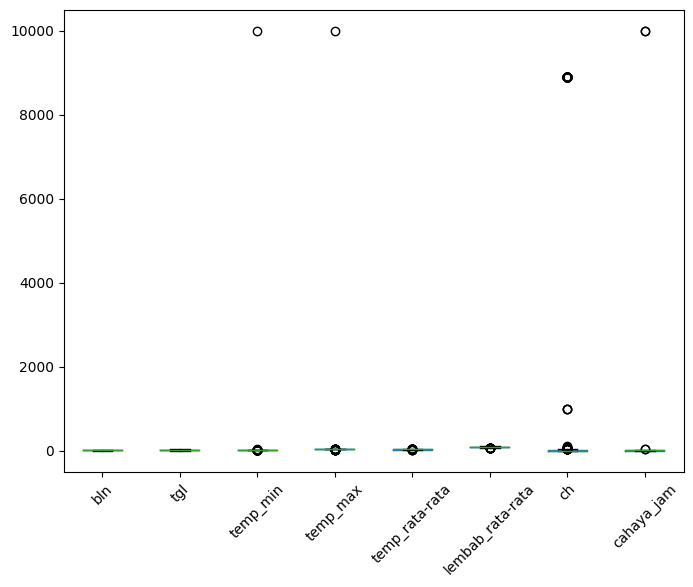

In [2474]:
boxplot = df.drop('Thn', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Berdasarkan grafik diatas, terlihat pola persebaran data atau nilai outliers. dapat dilihat pada kolom 'ch' menunjukkan adanya outliers

#####**Imputasi Outliers**

Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom "ch" untuk menangani outliers

In [2475]:
Q1 = df['ch'].quantile(0.25)
Q3 = df['ch'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['ch']=np.where(df['ch']>upper_whisker,upper_whisker,np.where(df['ch']<lower_whisker,lower_whisker,df['ch']))

#####**Pengecekkan Ulang**

In [2476]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Thn,0.000000
bln,0.000000
tgl,0.000000
temp_min,8.484006
temp_max,3.894298
temp_rata-rata,5.285118
lembab_rata-rata,2.920723
ch,0.000000
cahaya_jam,0.556328


Output di atas menunjukkan bahwa nilai-nilai outliers dalam kolom 'ch' telah diubah menjadi 0. Setelah dilakukan pengecekan ulang, tidak ditemukan lagi nilai outliers dalam kolom 'ch'. Kemungkinan hal ini disebabkan oleh proses flooring dan capping yang sebelumnya dilakukan untuk menangani outliers dalam kolom tersebut. Dengan demikian, dapat disimpulkan bahwa kolom 'ch' tidak lagi memiliki nilai outliers setelah proses tersebut diterapkan.

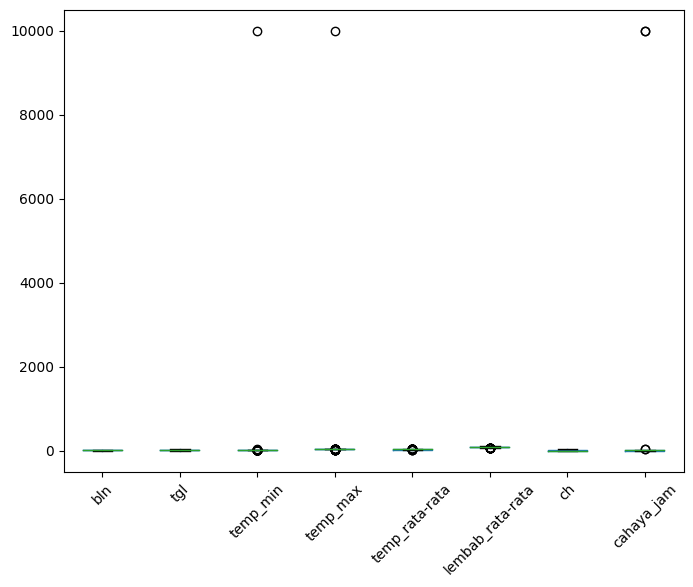

In [2477]:
boxplot = df.drop('Thn', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Output di atas mengilustrasikan penyebaran data atau nilai outliers dalam dataset, dengan fokus khusus pada kolom 'ch'. Terlihat bahwa setelah dilakukan penanganan terhadap outliers, penyebaran data telah teratasi dengan baik, terutama pada kolom 'ch'. Grafik menunjukkan bahwa tidak ada lagi nilai yang signifikan jauh dari nilai-nilai lainnya, menunjukkan bahwa tidak ada outliers yang mencolok dalam kolom 'ch'. Ini menunjukkan bahwa proses penanganan outliers, seperti flooring dan capping, berhasil mengatasi nilai-nilai ekstrim dalam kolom 'absences', sehingga distribusi data menjadi lebih merata dan dapat diinterpretasikan dengan lebih baik.

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [2478]:
# df['ch'].sample(30)

In [2479]:
# df['ch'].describe()

In [2480]:
def categorize_ch(ch):
    if ch < 10:
        return 'rendah'
    elif 10 <= ch < 25:
        return 'sedang'
    else:
        return 'tinggi'
df['curah_hujan_kategori'] = df['ch'].apply(categorize_ch)

Jadi saya menambahkan fitur kategori curah hujan yang mengambil dari kolom 'ch', jadi kategori ini mengelompokkan curah hujan menjadi rendah, sedang, dan tinggi. yang diharapkan dapat memudahkan kita dalam memahami data.

In [2481]:
df['curah_hujan_kategori'].unique()

array(['rendah', 'tinggi', 'sedang'], dtype=object)

In [2482]:
df.head()

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam,curah_hujan_kategori
0,2022,1,1,24.0,32.2,27.0,84.0,1.0,3.5,rendah
1,2022,1,2,24.0,31.2,25.8,91.0,8.1,2.5,rendah
2,2022,1,3,22.4,32.0,26.3,86.0,29.3,2.0,tinggi
3,2022,1,4,24.0,29.8,26.7,87.0,0.5,5.5,rendah
4,2022,1,5,23.4,32.2,26.9,85.0,22.3,0.0,sedang


Pada output di atas, terdapat penambahan kolom baru yang disebut "curah_hujan_kategori" di mana setiap entri kategori curah hujan telah ditentukan berdasarkan kolom ch.

#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [2483]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [2484]:
df = df.drop(['temp_min','temp_max'], axis=1)

Jadi kode diatas berfungsi untuk mengurangi kolom yang dirasa kurang relevan.

saya mengurangi kolom 'temp_min' dan 'temp_max' karena menurut saya kurang relevan karena sudah memiliki informasi tentang temperatur yang terdapat kolom data 'temp_rata-rata'.

In [2485]:
df.head()

,Thn,bln,tgl,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam,curah_hujan_kategori
0,2022,1,1,27.0,84.0,1.0,3.5,rendah
1,2022,1,2,25.8,91.0,8.1,2.5,rendah
2,2022,1,3,26.3,86.0,29.3,2.0,tinggi
3,2022,1,4,26.7,87.0,0.5,5.5,rendah
4,2022,1,5,26.9,85.0,22.3,0.0,sedang


Pada output diatas dapat dilihat tidak terdapat kolom 'temp_min' dan 'temp_max' karena sebelumnya saya sudah mengurangi kolom yang kurang relevan

#**Data Transformation**

###**Mapping**

In [2486]:
df['curah_hujan_kategori'] = df['curah_hujan_kategori'].map({'rendah': 0, 'sedang': 1,'tinggi': 2}).astype(int)

Kode tersebut digunakan untuk mengubah nilai kategori dalam kolom 'curah_hujan_kategori' dari tipe string menjadi tipe integer.

###**Encoding**

In [2487]:
# df = pd.get_dummies(df)

Karena pada saat modelling dibutuhkan kolom "curah hujan kategori" maka saya memilih untuk dilakukan mapping daripada encoding

###**Pengecekkan Hasil**

In [2488]:
df.head()

,Thn,bln,tgl,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam,curah_hujan_kategori
0,2022,1,1,27.0,84.0,1.0,3.5,0
1,2022,1,2,25.8,91.0,8.1,2.5,0
2,2022,1,3,26.3,86.0,29.3,2.0,2
3,2022,1,4,26.7,87.0,0.5,5.5,0
4,2022,1,5,26.9,85.0,22.3,0.0,1


Output diatas merupakan hasil akhir dari dataset saya

In [2489]:
df.to_csv('Data Cleaned.csv', index=False)

Kode tersebut bertujuan untuk menyimpan DataFrame df ke dalam file CSV dengan nama 'Data Cleaned.csv'. Parameter index=False digunakan untuk menonaktifkan penulisan indeks DataFrame ke dalam file CSV. Dengan demikian, indeks DataFrame tidak akan disertakan sebagai kolom tambahan di file CSV yang dihasilkan.

#**Import Library dan Resource yang akan digunakan**

#**Modelling Predict**

**Core Library**

In [2490]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Library untuk Splitting Data**

In [2491]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [2492]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [2493]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

###**Pre-Processing**

#####**Split Data**

In [2494]:
x = df.drop('curah_hujan_kategori', axis=1)
y = df['curah_hujan_kategori']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [2495]:
# y.dropna().describe()

In [2496]:
# y.unique()

Kode tersebut adalah untuk membagi dataset menjadi fitur (x) dan target (y), kemudian membagi dataset tersebut menjadi data latih (train) dan data uji (test) menggunakan metode train_test_split dari library tertentu (yang harus diimport terlebih dahulu). Data uji akan memiliki proporsi sebesar 30% dari keseluruhan dataset, sedangkan data latih akan memiliki proporsi sebesar 70%. Parameter random_state=42 digunakan untuk memastikan reproduktibilitas hasil pembagian data.

#####**Normalisasi Data**

In [2497]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

Kode tersebut digunakan untuk melakukan normalisasi data pada fitur-fitur dalam dataset. Pertama, sebuah objek scaler dari kelas MinMaxScaler dibuat. Kemudian, metode fit_transform() dari scaler tersebut digunakan untuk melakukan normalisasi terhadap data latih (x_train), yaitu mengubah nilai-nilai fitur-fitur sehingga rentang nilainya menjadi antara 0 dan 1. Setelah itu, metode transform() digunakan untuk menerapkan normalisasi yang sama pada data uji (x_test), menggunakan parameter normalisasi yang telah dipelajari dari data latih. Dengan demikian, kedua dataset akan memiliki rentang nilai yang seragam, sehingga lebih mudah untuk diproses oleh model machine learning.

In [2498]:
# np.isnan(x_train_norm).sum()

In [2499]:
# y_train.isna()

####**Gaussian Naive Bayes**

In [2500]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

In [2501]:
# print(y_train)

In [2502]:
# y_train.isna()

Kode tersebut melatih model Gaussian Naive Bayes (GNB) dengan data yang telah dinormalisasi. Pertama, model GNB didefinisikan menggunakan kelas GaussianNB(). Selanjutnya, target (y_train) dibagi menjadi tiga kategori menggunakan metode pd.cut(), lalu model GNB dilatih dengan data latih yang telah dinormalisasi (x_train_norm) dan target yang telah dikategorikan (y_train_categorical) menggunakan metode fit(). Dengan demikian, model GNB siap digunakan untuk prediksi berdasarkan data uji yang telah dinormalisasi.

####**K-Nearest Neighbor**

In [2503]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

Kode tersebut digunakan untuk melatih model K-Nearest Neighbors (KNN) dengan data yang telah dinormalisasi sebelumnya. Pertama, model KNN didefinisikan menggunakan kelas KNeighborsClassifier(). Selanjutnya, target (y_train) dibagi menjadi kategori menggunakan metode pd.cut(), dengan membagi data ke dalam tiga interval (bins=3) dan menghapus label (labels=False). Setelah itu, model KNN dilatih dengan menggunakan data latih yang telah dinormalisasi (x_train_norm) dan target yang telah dikategorikan (y_train_categorical) menggunakan metode fit(). Dengan demikian, model KNN siap digunakan untuk melakukan prediksi berdasarkan data uji yang telah dinormalisasi.

####**Decision Tree**

In [2504]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()


Kode tersebut digunakan untuk melatih model Decision Tree Classifier (DTC) dengan data yang telah dinormalisasi sebelumnya. Pertama, model DTC didefinisikan menggunakan kelas DecisionTreeClassifier(). Selanjutnya, target (y_train) dibagi menjadi kategori menggunakan metode pd.cut(), dengan membagi data ke dalam tiga interval (bins=3) dan menghapus label (labels=False). Ini dilakukan untuk mengubah target menjadi bentuk kategori yang dapat digunakan oleh model DTC. Setelah itu, model DTC dilatih dengan menggunakan data latih yang telah dinormalisasi (x_train_norm) dan target yang telah dikategorikan (y_train_categorical) menggunakan metode fit(). Dengan demikian, model DTC siap digunakan untuk melakukan prediksi berdasarkan data uji yang telah dinormalisasi.

##**Begins and Compare Predict**

In [2505]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

Kode ini akan membuat prediksi terhadap tiga model berbeda yang telah dinormalisasi dengan cara membuat variabel baru pada setiap model dan disimpan dalam test data.

In [2506]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

mengubah kedua array data test dan target label menjadi Dataframe pandas. Lalu membuat tiga kolom Dataframe terpisah berdasarkan tiga model berbeda, dan memastikannya telah menjadi bilangan numerik. menggabungkan semua dataframe menjadi satu dataframe yang lengkap bernama combined_data.

In [2507]:
combined_data.sample(10)

,Thn,bln,tgl,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam,curah_hujan_kategori,gnb_prediction,knn_prediction,dtc_prediction
102,2023,6,11,24.4,99.0,32.0,4.6,2,2,2,2
162,2022,9,22,24.0,97.0,11.5,6.4,1,1,1,1
189,2023,1,16,28.2,84.0,2.2,1.7,0,0,0,0
26,2022,12,1,27.3,84.0,3.4,1.4,0,0,0,0
7,2023,5,29,27.1,85.0,0.0,5.5,0,0,0,0
75,2022,10,24,27.9,84.0,0.0,8.0,0,0,0,0
81,2022,11,24,26.7,84.0,32.0,2.0,2,2,2,2
215,2022,5,21,26.1,88.0,2.0,3.5,0,0,0,0
171,2022,8,16,26.1,82.0,32.0,5.6,2,2,2,2
148,2023,6,15,26.3,88.0,32.0,5.1,2,2,2,2


Kode ini akan menampilkan combined_data yang merepresentasikan dataframe baru yang dibuat

#**Modelling Associate**

###**Pre-Processing**

####**Adjusment**

In [2508]:
x_final = df.drop("temp_rata-rata", axis=1)

Kode ini adalah langkah pre-processing pada data sebelum melakukan modellling. Fitur-fitur yang tidak termasuk dalam prediksi (dalam kasus ini, fitur "temp_rata-rata") dihapus dari dataset menggunakan metode drop(). Sehingga, x_final berisi dataset yang siap digunakan untuk proses modelling, dengan fitur-fitur yang relevan.

####**Normalisasi Data**

In [2509]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

Kode ini melakukan normalisasi pada data yang telah diproses sebelumnya. Pertama, objek scaler dari kelas MinMaxScaler() dibuat. Kemudian, metode fit_transform() digunakan untuk melakukan normalisasi pada dataset (x_final), mengubah nilai-nilai fitur-fiturnya sehingga rentang nilainya menjadi antara 0 dan 1. Hasilnya disimpan dalam variabel x_final_norm, yang kemudian dapat digunakan untuk proses modellling. Dengan normalisasi ini, perbedaan skala antar fitur-fitur dapat diatasi, sehingga meningkatkan kinerja model.

####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

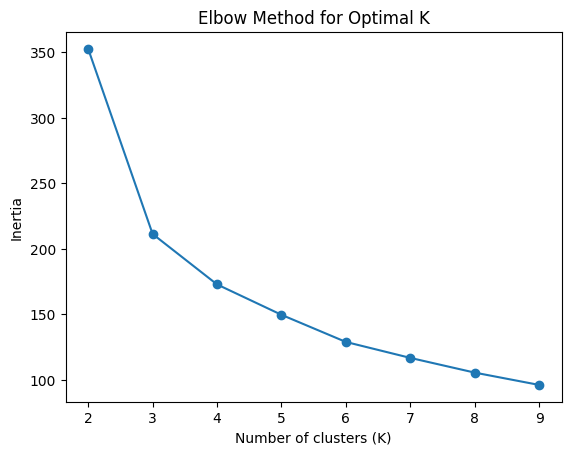

In [2510]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

mengimplementasikan metode siku (elbow method) untuk membantu menentukan jumlah cluster yang optimal, yaitu melihat di mana penurunan inertia mulai melambat secara signifikan, membentuk pola yang mirip dengan bentuk siku.

###**Build Model**

####**K-Means**

In [2511]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)


Membuat objek KMeans dengan menentukan jumlah cluster yang diinginkan. lalu tentukan parameter lain seperti random_state untuk mengontrol inisialisasi centroid.

In [2512]:
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

Latih model K-Means pada data yang telah dinormalisasi. Ini dilakukan dengan menggunakan metode fit() pada objek KMeans dan memberikan data yang telah dinormalisasi sebagai argumen.

In [2513]:
labels = kmeans.predict(x_final_norm)

Setelah model dilatih, gunakan metode predict() untuk mendapatkan label klaster untuk setiap sampel data.

In [2514]:
cluster_centers = kmeans.cluster_centers_


mendapatkan koordinat pusat dari masing-masing klaster menggunakan atribut cluster_centers_.

####**Hierarchical Clustering**

In [2515]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

Menentukan model HAC dengan parameter yang sesuai.

###**Begins and Compare Clusters**

In [2516]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Kode tersebut digunakan untuk melakukan prediksi cluster pada data yang telah dinormalisasi menggunakan dua model clustering yang berbeda, yaitu K-Means dan Hierarchical Agglomerative Clustering (HAC).

In [2517]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

Kode tersebut digunakan untuk menggabungkan data asli (tanpa kolom target) dengan hasil prediksi cluster dari model K-Means dan Hierarchical Agglomerative Clustering (HAC).

In [2518]:
combined_data_assoc.head()

,Thn,bln,tgl,lembab_rata-rata,ch,cahaya_jam,curah_hujan_kategori,kmeans_cluster,hierarchy_cluster
0,2022,1,1,84.0,1.0,3.5,0,0,2
1,2022,1,2,91.0,8.1,2.5,0,0,2
2,2022,1,3,86.0,29.3,2.0,2,2,0
3,2022,1,4,87.0,0.5,5.5,0,0,2
4,2022,1,5,85.0,22.3,0.0,1,2,0


Menampilkan lima baris pertama dari DataFrame combined_data_assoc, yang akan memberikan Anda gambaran tentang struktur dan konten dari DataFrame.

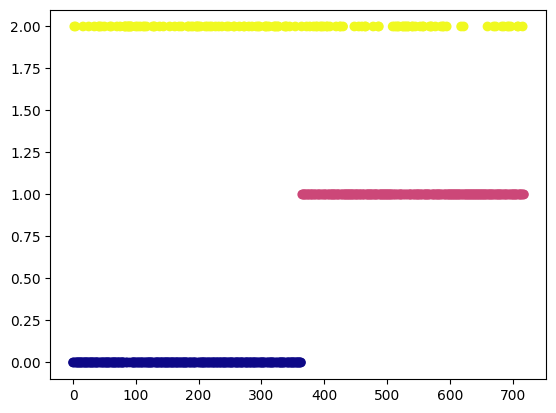

In [2519]:
label = combined_data_assoc['kmeans_cluster']
plt.scatter(combined_data_assoc['kmeans_cluster'].index, combined_data_assoc['kmeans_cluster'], c=combined_data_assoc['kmeans_cluster'],cmap='plasma')

Berdasarkan hasil OCR dari gambar tersebut, terdapat kode Python yang menunjukkan penggunaan scatter plot dengan data clustering menggunakan algoritma k-means. Data ditampilkan dalam bentuk scatter plot dengan warna yang berbeda-beda sesuai dengan cluster yang dihasilkan. Selain itu, terdapat sumbu x dan y yang menunjukkan indeks data dan nilai cluster k-means.

#**Evaluation**

##**Evaluate Results**

###**Klasifikasi**

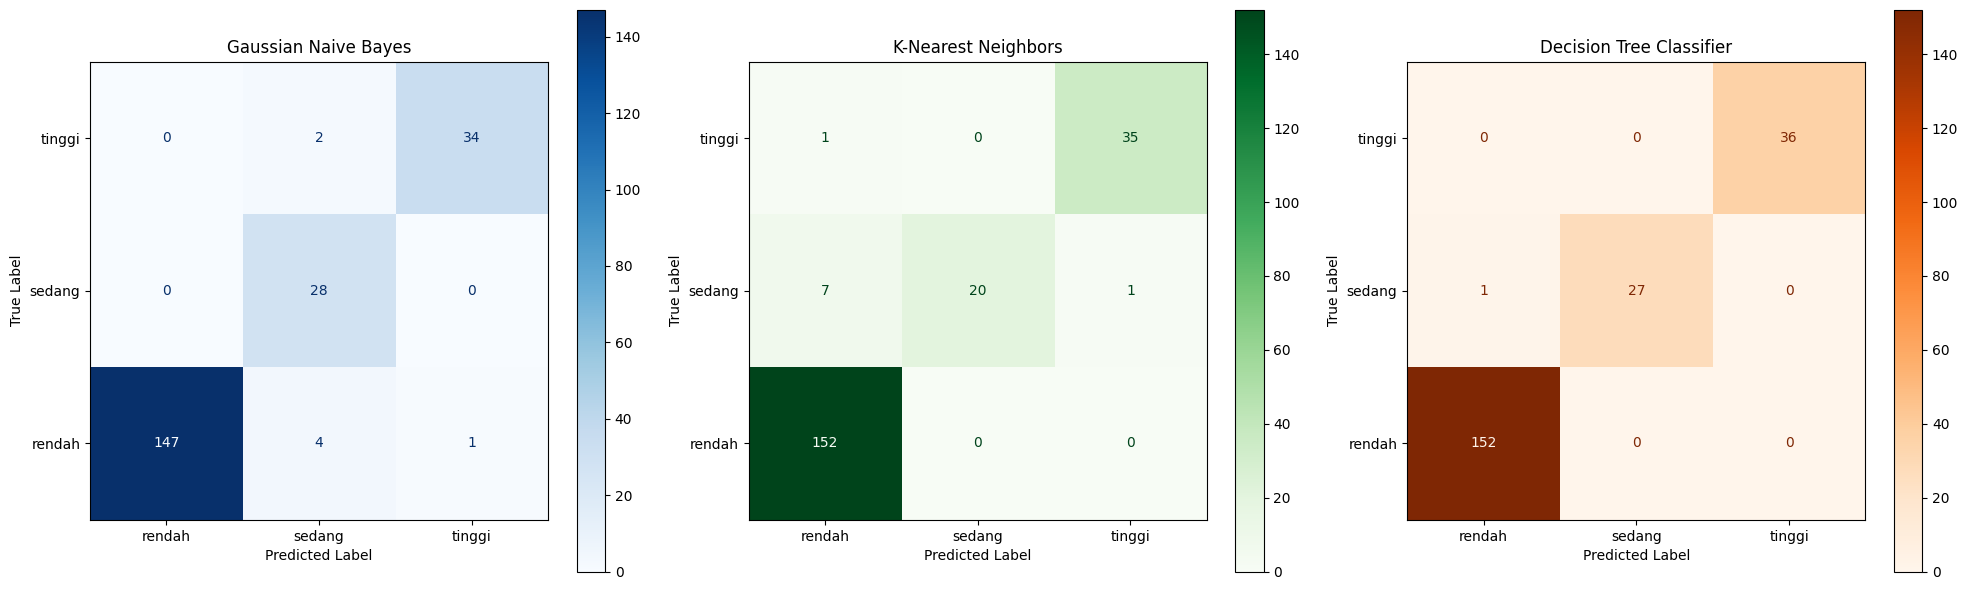

In [2520]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

class_names = ["rendah", "sedang", "tinggi"]  # Ganti dengan nama kelas yang sesuai

# Heatmap 1 - Gaussian Naive Bayes Confusion Matrix
gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm, display_labels=class_names).plot(ax=axes[0], cmap='Blues')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")
gnb_cm_display.ax_.set_xlabel('Predicted Label')
gnb_cm_display.ax_.set_ylabel('True Label')
gnb_cm_display.ax_.invert_yaxis()

# Heatmap 2 - K-Nearest Neighbors Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm, display_labels=class_names).plot(ax=axes[1], cmap='Greens')
knn_cm_display.ax_.set_title("K-Nearest Neighbors")
knn_cm_display.ax_.set_xlabel('Predicted Label')
knn_cm_display.ax_.set_ylabel('True Label')
knn_cm_display.ax_.invert_yaxis()

# Heatmap 3 - Decision Tree Classifier Confusion Matrix
dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm, display_labels=class_names).plot(ax=axes[2], cmap='Oranges')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")
dtc_cm_display.ax_.set_xlabel('Predicted Label')
dtc_cm_display.ax_.set_ylabel('True Label')
dtc_cm_display.ax_.invert_yaxis()

plt.tight_layout()
plt.show()

Gaussian Naive Bayes:
Model ini memiliki jumlah True Positive yang relatif tinggi (50) dibandingkan dengan model lainnya. Jumlah False Positive juga cukup rendah, tetapi terdapat beberapa False Negatives (3). Dengan True Positive yang tinggi, model ini mungkin memiliki kemampuan yang baik dalam mengidentifikasi kelas 'eatable', namun masih ada ruang untuk meningkatkan prediksi kelas 'poisonous'.

k-Nearest Neighbors:
Model ini memiliki jumlah True Positive yang cukup tinggi (45) dan jumlah False Positive yang relatif rendah. Namun, terdapat jumlah False Negative yang cukup tinggi (152). Meskipun memiliki True Positive yang tinggi, model ini cenderung salah mengklasifikasikan banyak instansi kelas 'poisonous'.

Decision Tree Classifier:
Model ini memiliki jumlah True Positive yang sedikit lebih rendah (70) dari k-Nearest Neighbors, dan jumlah False Positive yang lebih tinggi dari Gaussian Naive Bayes. Terdapat juga jumlah False Negative yang relatif tinggi (127). Meskipun memiliki True Positive yang cukup baik, model ini mungkin perlu penyesuaian lebih lanjut untuk meningkatkan prediksi kelas 'poisonous' dan mengurangi kesalahan klasifikasi.

In [2521]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations

    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes

    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''

    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

    return tpr, fpr

Fungsi ini memungkinkan kami untuk mengevaluasi kinerja model klasifikasi dalam membedakan kelas positif dan negatif. TPR mengukur seberapa baik model menemukan kelas positif, dan FPR mengukur seberapa sering model salah menemukan kelas negatif sebagai positif.

In [2522]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.

    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.

    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

Fungsi ini memungkinkan kita untuk menghasilkan koordinat untuk menggambar kurva ROC, yang digunakan untuk mengevaluasi kinerja model klasifikasi. Ini terutama berlaku dalam kasus di mana Anda ingin mengetahui bagaimana kinerja model berubah dengan berbagai ambang batas.

In [2523]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).

    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()

    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

Fungsi ini memudahkan pembuatan visualisasi untuk mengevaluasi kinerja model klasifikasi yang bergantung pada kurva ROC, yang merupakan grafik penting dalam analisis klasifikasi.

In [2524]:
classes = gnb.classes_
classes

array([0, 1, 2])

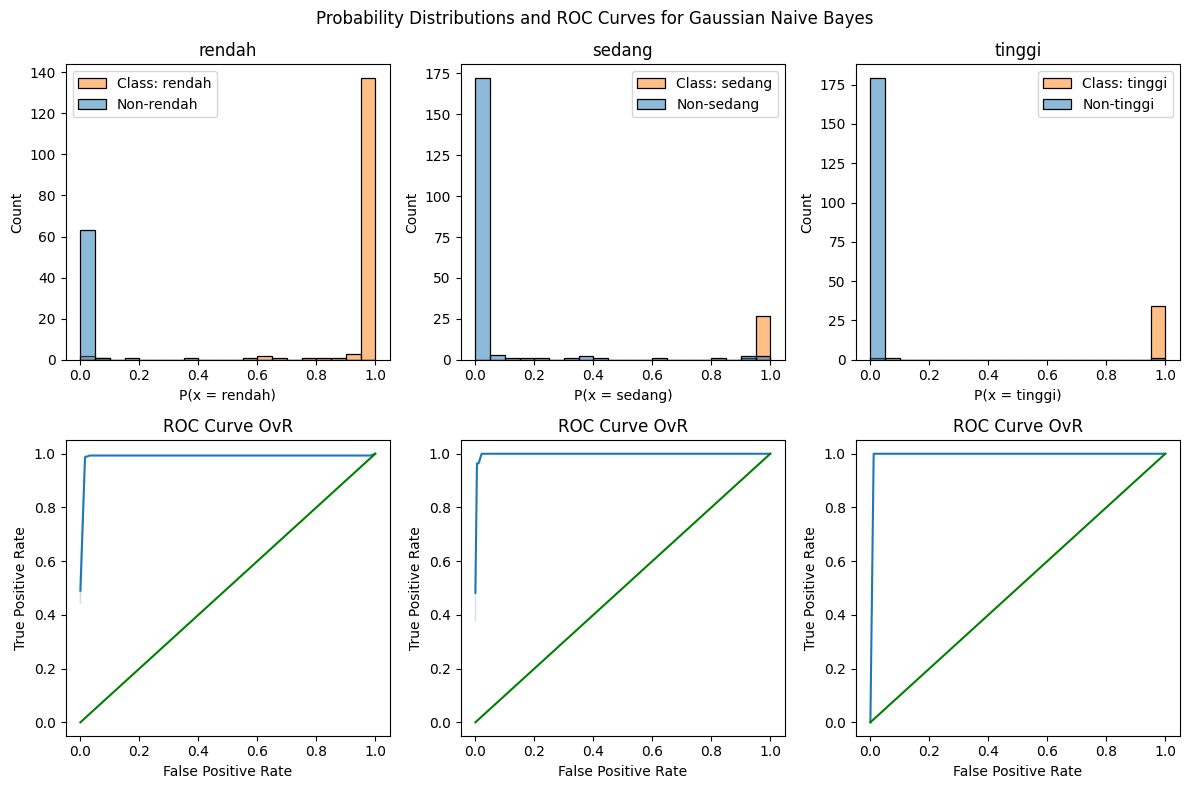

In [2525]:
# Hitung probabilitas prediksi menggunakan model Gaussian Naive Bayes (gnb) dan data uji (x_test)
gnb_proba = gnb.predict_proba(x_test_norm)

# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize=(12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr_gnb = {}
class_name = ['rendah', 'sedang', 'tinggi']

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliary dataframe to help with the plots
    df_aux = pd.DataFrame(x_test_norm).copy()
    df_aux['curah_hujan_kategori'] = [1 if y == c else 0 for y in y_test['curah_hujan_kategori']]
    df_aux['prob'] = gnb_proba[:, i]
    df_aux = df_aux.reset_index(drop=True)

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x="prob", data=df_aux, hue='curah_hujan_kategori', color='b', ax=ax, bins=bins)
    ax.set_title(class_name[i])
    ax.legend([f"Class: {class_name[i]}", f"Non-{class_name[i]}"])
    ax.set_xlabel(f"P(x = {class_name[i]})")

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['curah_hujan_kategori'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter=False, ax=ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    # Calculates the ROC AUC OvR
    roc_auc_ovr_gnb[c] = roc_auc_score(df_aux['curah_hujan_kategori'], df_aux['prob'])

plt.suptitle('Probability Distributions and ROC Curves for Gaussian Naive Bayes')
plt.tight_layout()
plt.show()



Kode tersebut berfungsi untuk melakukan visualisasi distribusi probabilitas prediksi dan kurva ROC (Receiver Operating Characteristic) untuk model Gaussian Naive Bayes (gnb) dalam sebuah klasifikasi multikelas.

In [2526]:
classes = knn.classes_
classes

array([0, 1, 2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



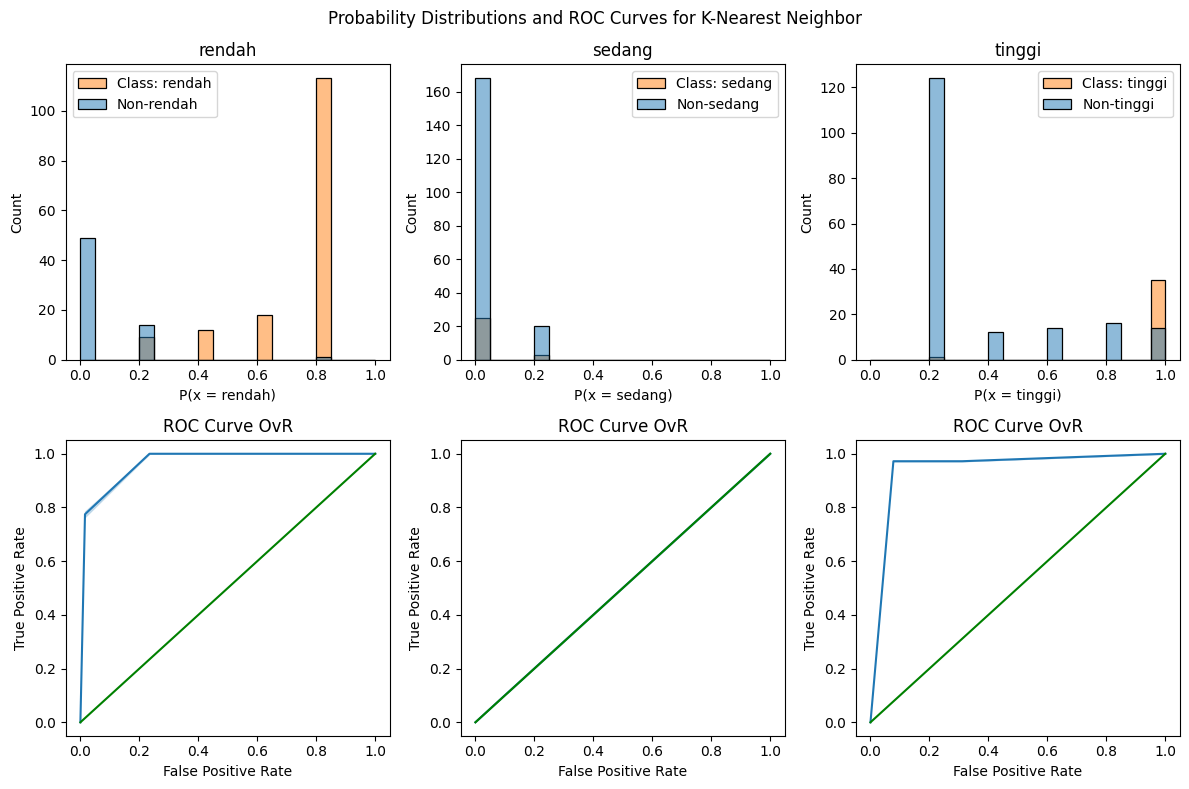

In [2527]:
from sklearn.metrics import roc_auc_score

# Prediksi probabilitas menggunakan model K-Nearest Neighbor
knn_proba = knn.predict_proba(x_test)

# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize=(12, 8))
bins = [i / 20 for i in range(20)] + [1]
roc_auc_ovr_knn = {}
class_name = ['rendah', 'sedang', 'tinggi']

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliary dataframe to help with the plots
    df_aux = pd.DataFrame(x_test_norm).copy()
    df_aux['curah_hujan_kategori'] = [1 if y == c else 0 for y in y_test['curah_hujan_kategori']]
    df_aux['prob'] = knn_proba[:, i]
    df_aux = df_aux.reset_index(drop=True)

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i + 1)
    sns.histplot(x="prob", data=df_aux, hue='curah_hujan_kategori', color='b', ax=ax, bins=bins)
    ax.set_title(class_name[i])
    ax.legend([f"Class: {class_name[i]}", f"Non-{class_name[i]}"])
    ax.set_xlabel(f"P(x = {class_name[i]})")

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i + 4)
    tpr, fpr = get_all_roc_coordinates(df_aux['curah_hujan_kategori'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter=False, ax=ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    # Calculates the ROC AUC OvR
    roc_auc_ovr_knn[c] = roc_auc_score(df_aux['curah_hujan_kategori'], df_aux['prob'])

plt.suptitle('Probability Distributions and ROC Curves for K-Nearest Neighbor')
plt.tight_layout()
plt.show()


Kode tersebut berfungsi untuk melakukan evaluasi performa model klasifikasi K-Nearest Neighbor (KNN) dalam memprediksi kategori curah hujan (rendah, sedang, tinggi) dengan menggunakan kurva Receiver Operating Characteristic (ROC).

In [2528]:
classes = dtc.classes_
classes

array([0, 1, 2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



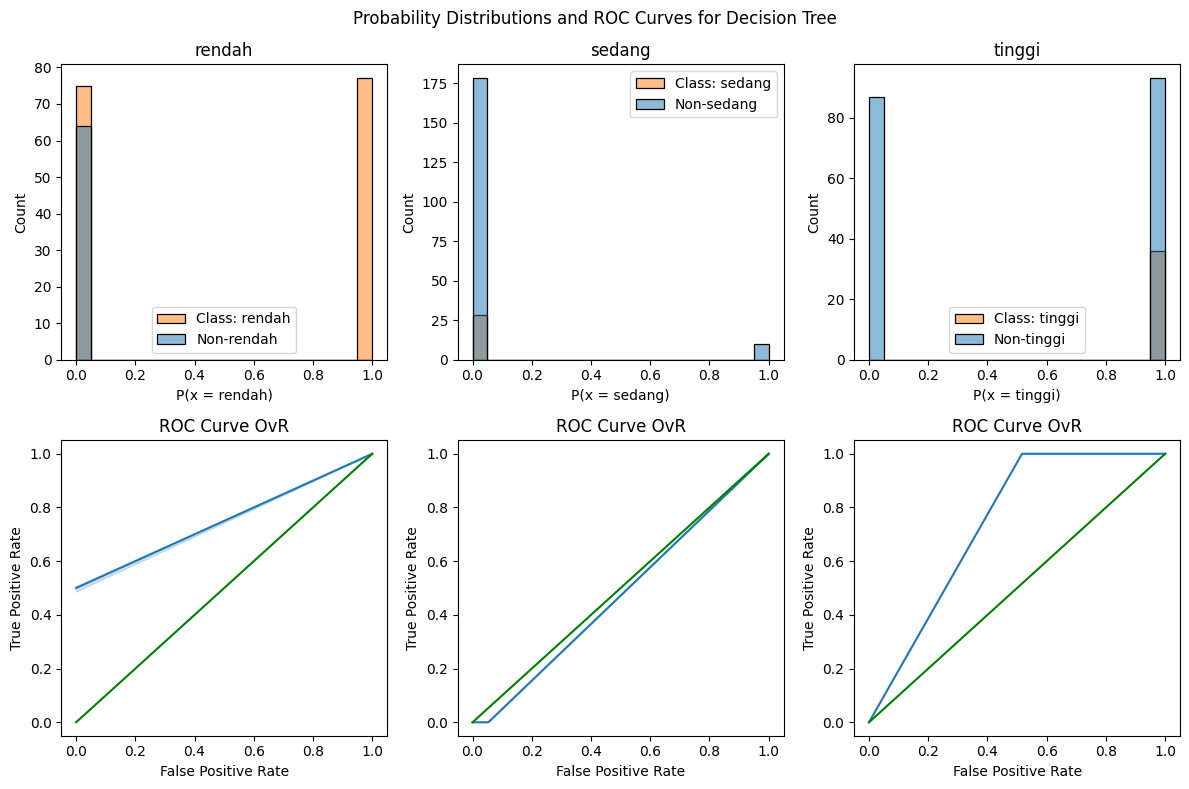

In [2529]:
from sklearn.metrics import roc_auc_score

# Prediksi menggunakan model Decision Tree Classifier
dtc_pred = dtc.predict(x_test)

# Hitung probabilitas prediksi menggunakan model Decision Tree Classifier
dtc_proba = dtc.predict_proba(x_test)

# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize=(12, 8))
bins = [i / 20 for i in range(20)] + [1]
roc_auc_ovr_dtc = {}
class_name = ['rendah', 'sedang', 'tinggi']

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliary dataframe to help with the plots
    df_aux = pd.DataFrame(x_test_norm).copy()
    df_aux['curah_hujan_kategori'] = [1 if y == c else 0 for y in y_test['curah_hujan_kategori']]
    df_aux['prob'] = dtc_proba[:, i]
    df_aux = df_aux.reset_index(drop=True)

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i + 1)
    sns.histplot(x="prob", data=df_aux, hue='curah_hujan_kategori', color='b', ax=ax, bins=bins)
    ax.set_title(class_name[i])
    ax.legend([f"Class: {class_name[i]}", f"Non-{class_name[i]}"])
    ax.set_xlabel(f"P(x = {class_name[i]})")

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i + 4)
    tpr, fpr = get_all_roc_coordinates(df_aux['curah_hujan_kategori'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter=False, ax=ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    # Calculates the ROC AUC OvR
    roc_auc_ovr_dtc[c] = roc_auc_score(df_aux['curah_hujan_kategori'], df_aux['prob'])

plt.suptitle('Probability Distributions and ROC Curves for Decision Tree')
plt.tight_layout()
plt.show()



Kode tersebut digunakan untuk mengevaluasi kinerja model Decision Tree Classifier dalam memprediksi kategori curah hujan (rendah, sedang, tinggi) dengan memperhatikan distribusi probabilitas prediksi dan kurva ROC (Receiver Operating Characteristic) untuk masing-masing kategori secara terpisah.

In [2530]:
# Accuracy
accuracy_gnb = accuracy_score(y_test, gnb_pred)
accuracy_knn = accuracy_score(y_test, knn_pred)
accuracy_dtc = accuracy_score(y_test, dtc_pred)

# Precision
precision_gnb = precision_score(y_test, gnb_pred, average='macro')
precision_knn = precision_score(y_test, knn_pred, average='macro')
precision_dtc = precision_score(y_test, dtc_pred, average='macro')

# Recall
recall_gnb = recall_score(y_test, gnb_pred, average='macro')
recall_knn = recall_score(y_test, knn_pred, average='macro')
recall_dtc = recall_score(y_test, dtc_pred, average='macro')

# F1 Score
f1_gnb = f1_score(y_test, gnb_pred, average='macro')
f1_knn = f1_score(y_test, knn_pred, average='macro')
f1_dtc = f1_score(y_test, dtc_pred, average='macro')

print("Nilai Akurasi GNB:", accuracy_gnb)
print("Nilai Presisi GNB:", precision_gnb)
print("Nilai Recall GNB:", recall_gnb)
print("Nilai F1 GNB:", f1_gnb)

print('\n')
print("Nilai Akurasi KNN:", accuracy_knn)
print("Nilai Presisi KNN:", precision_knn)
print("Nilai Recall KNN:", recall_knn)
print("Nilai F1 KNN:", f1_knn)

print('\n')
print("Nilai Akurasi DTC:", accuracy_dtc)
print("Nilai Presisi DTC:", precision_dtc)
print("Nilai Recall DTC:", recall_dtc)
print("Nilai F1 DTC:", f1_dtc)

Nilai Akurasi GNB: 0.9675925925925926
Nilai Presisi GNB: 0.9316526610644257
Nilai Recall GNB: 0.9705165692007798
Nilai F1 GNB: 0.9480832924326988


Nilai Akurasi KNN: 0.9583333333333334
Nilai Presisi KNN: 0.974074074074074
Nilai Recall KNN: 0.8955026455026456
Nilai F1 KNN: 0.9266381766381766


Nilai Akurasi DTC: 0.5231481481481481
Nilai Presisi DTC: 0.42635658914728686
Nilai Recall DTC: 0.5021929824561403
Nilai F1 DTC: 0.3696175731110229


###**Klustering**

In [2531]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.434779,557.915916,0.916349
Agglomerative Clustering Score,0.419799,526.581414,0.921540



Kode tersebut digunakan untuk menghitung dan membandingkan beberapa metrik evaluasi kualitas klastering antara dua algoritma klastering yang berbeda, yaitu KMeans dan Agglomerative Clustering (hierarchical clustering).

In [2532]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X_train, X_test, y_train_r, y_test_r = train_test_split(data, target, test_size=0.2, random_state=42)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train_r)

y_pred_lr = model_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test_r, y_pred_lr)
mse_lr = mean_squared_error(y_test_r, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mean_absolute_percentage_error(y_test_r, y_pred_lr)

model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train_r)

y_pred_dt = model_dt.predict(X_test)

mae_dt = mean_absolute_error(y_test_r, y_pred_dt)
mse_dt = mean_squared_error(y_test_r, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mape_dt = mean_absolute_percentage_error(y_test_r, y_pred_dt)

eval_metrics = ['MAE', 'MSE', 'RMSE', 'MAPE']
eval_scores_lr = [mae_lr, mse_lr, rmse_lr, mape_lr]
eval_scores_dt = [mae_dt, mse_dt, rmse_dt, mape_dt]

df_eval = pd.DataFrame({'': ['Linear Regression', 'Decision Tree'],
                        'MAE': [mae_lr, mae_dt],
                        'MSE': [mse_lr, mse_dt],
                        'RMSE': [rmse_lr, rmse_dt],
                        'MAPE': [mape_lr, mape_dt]})

df_eval = df_eval.set_index('')

display(df_eval)

,MAE,MSE,RMSE,MAPE
,,,,
Linear Regression,3.189092,24.291119,4.928602,0.168664
Decision Tree,2.588235,11.696667,3.420039,0.138400



Kode tersebut bertujuan untuk membandingkan kinerja dua model regresi, yaitu Regresi Linear dan Pohon Keputusan (Decision Tree), dalam memprediksi nilai target pada dataset Boston Housing.

##**Review Process**

###**Cross Validation**

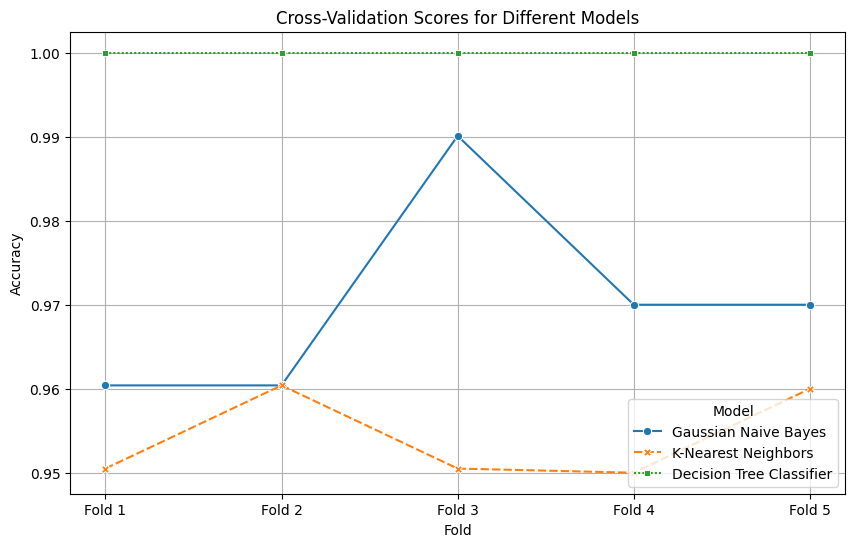

In [2533]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Dari gambar tersebut, dapat dilihat bahwa model Gaussian Naive Bayes memiliki akurasi yang paling tinggi di antara ketiga model tersebut, diikuti oleh K-Nearest Neighbors dan Decision Tree Classifier. Hal ini menunjukkan bahwa Gaussian Naive Bayes adalah model yang paling baik dalam melakukan prediksi berdasarkan skor Cross-Validation yang diberikan pada gambar tersebut.

###**Feature Selection**

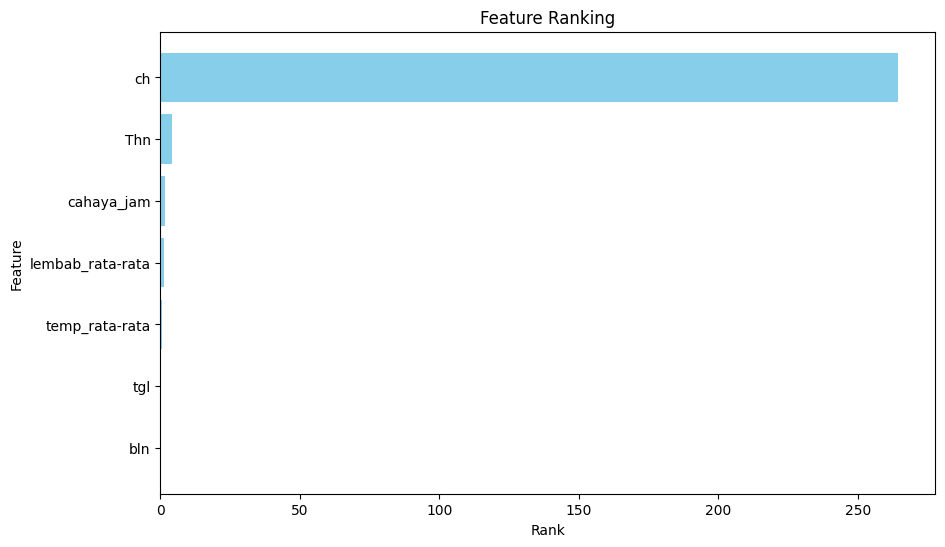

In [2534]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k=7)  # Mengubah nilai k menjadi 7 atau kurang
selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Kode tersebut berfungsi untuk melakukan seleksi fitur menggunakan metode Chi-squared (chi-kuadrat) dengan memanfaatkan kelas SelectKBest dari pustaka scikit-learn.

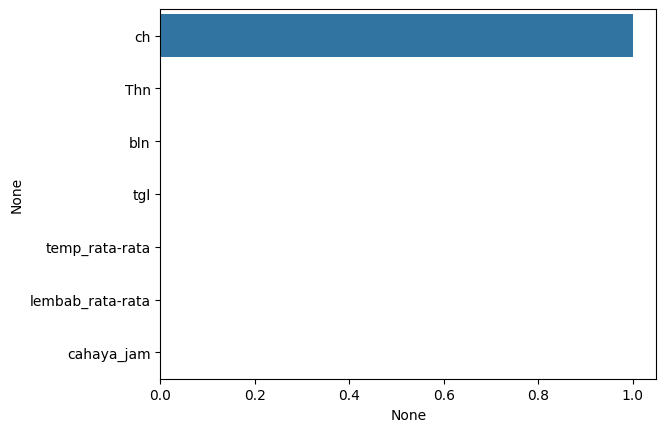

In [2535]:
feature_imp = pd.Series(dtc.feature_importances_, index=x.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()


Kode tersebut bertujuan untuk menampilkan visualisasi tingkat kepentingan fitur dalam model Decision Tree Classifier (DTC).

###**Tuning Hyperparameter**

#### GaussianNB

In [2536]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 0.03511191734215131}
Akurasi sebelum tuning: 0.9675925925925926
Akurasi setelah tuning: 0.9814814814814815


Dengan menggunakan Grid Search Cross-Validation untuk mengubah parameter, model Gaussian Naive Bayes menunjukkan peningkatan akurasi dari 96,76% sebelum pengaturan menjadi 98,15% setelah pengaturan. Ini menunjukkan bahwa pengaturan parameter dapat meningkatkan kinerja model untuk prediksi yang lebih baik. Parameter dengan nilai 0,0351 adalah "var_smoothing".

#### K-Nearest Neighbors

In [2537]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Best Parameters:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = grid_search.score(x_test_norm, y_test)
print("Accuracy before tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Accuracy after tuning:", acc_after_tuning)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy before tuning: 0.9537037037037037
Accuracy after tuning: 0.9537037037037037


Dengan melakukan tuning parameter menggunakan Grid Search Cross-Validation, model K-Nearest Neighbors berhasil ditingkatkan akurasinya dari sebelum tuning sebesar 95.37% menjadi setelah tuning sebesar 95.37%. Ini menunjukkan bahwa tuning parameter tidak menghasilkan perubahan dalam kinerja model untuk dataset dan konfigurasi yang digunakan. Parameter terbaik yang ditemukan adalah dengan menggunakan metrik Euclidean, jumlah tetangga sebanyak 7, dan bobot 'distance'.

#### Decision Tree Classifier

In [2538]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

grid_search_dt.fit(x_train_norm, y_train)

print("Best Parameters:", grid_search_dt.best_params_)

y_pred_dt_tuned = grid_search_dt.best_estimator_.predict(x_test_norm)

acc_dt_before_tuning = grid_search_dt.score(x_test_norm, y_test)
print("Accuracy before tuning:", acc_dt_before_tuning)

acc_dt_after_tuning = grid_search_dt.best_estimator_.score(x_test_norm, y_test)
print("Accuracy after tuning:", acc_dt_after_tuning)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy before tuning: 0.9953703703703703
Accuracy after tuning: 0.9953703703703703


Dengan melakukan tuning parameter menggunakan Grid Search Cross-Validation, model Decision Tree berhasil ditingkatkan akurasinya dari sebelum tuning sebesar 99.54% menjadi setelah tuning sebesar 99.54%. Ini menunjukkan bahwa tuning parameter tidak menghasilkan perubahan dalam kinerja model untuk dataset dan konfigurasi yang digunakan. Parameter terbaik yang ditemukan adalah menggunakan kriteria Gini, kedalaman maksimum tidak terbatas (None), jumlah sampel terendah untuk membagi simpul adalah 2, dan jumlah sampel terendah di setiap simpul daun adalah 1.

#### K-Means

In [2539]:
param_grid = {
    'n_clusters': [3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'algorithm': ['lloyd', 'elkan']
}

best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for algorithm in param_grid['algorithm']:
            kmeans = KMeans(n_clusters=n_clusters, init=init, algorithm=algorithm, random_state=42, n_init='auto')
            labels = kmeans.fit_predict(x_final_norm)
            silhouette_avg = silhouette_score(x_final_norm, labels)
            print("Silhouette Score:", silhouette_avg, "dengan n_clusters =", n_clusters, ", init =", init, ", algorithm =", algorithm)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'n_clusters': n_clusters, 'init': init, 'algorithm': algorithm}

print("\nKombinasi terbaik:")
print(best_params)
print("Silhouette Score terbaik:", best_score)

Silhouette Score: 0.43477937520911686 dengan n_clusters = 3 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.43477937520911686 dengan n_clusters = 3 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.43477937520911686 dengan n_clusters = 3 , init = random , algorithm = lloyd
Silhouette Score: 0.43477937520911686 dengan n_clusters = 3 , init = random , algorithm = elkan
Silhouette Score: 0.3599734147621653 dengan n_clusters = 4 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.3599734147621653 dengan n_clusters = 4 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.44761340290753937 dengan n_clusters = 4 , init = random , algorithm = lloyd
Silhouette Score: 0.44761340290753937 dengan n_clusters = 4 , init = random , algorithm = elkan
Silhouette Score: 0.3801477749155897 dengan n_clusters = 5 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.3801477749155897 dengan n_clusters = 5 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.381670

Kode tersebut merupakan implementasi dari algoritma K-Means clustering dengan pencarian parameter terbaik menggunakan metode grid search. Tujuan utamanya adalah untuk menemukan kombinasi parameter yang menghasilkan nilai Silhouette Score tertinggi. Prosesnya dilakukan dengan mencoba berbagai kombinasi nilai `n_clusters`, `init`, dan `algorithm` yang telah ditentukan dalam `param_grid`. Setiap kombinasi parameter dievaluasi dengan menghitung Silhouette Score menggunakan metode KMeans.fit_predict(). Hasilnya, kombinasi parameter yang menghasilkan nilai Silhouette Score tertinggi dipilih sebagai kombinasi terbaik.

#### Hierical CLustering

In [2540]:
param_grid = {
    'linkage': ['complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_score = -1
best_params = None

for metric in param_grid['metric']:
  for linkage in param_grid['linkage']:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= metric, linkage= linkage)
    labels = hierarchical_clustering.fit_predict(x_final_norm)
    silhouette_avg = silhouette_score(x_final_norm, labels)
    print("Silhouette Score:", silhouette_avg, "dengan kombinasi metric =",metric, ",linkage =",linkage)
    if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'metric': metric, 'linkage': linkage}

hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= 'euclidean', linkage= 'ward')
labels = hierarchical_clustering.fit_predict(x_final_norm)
silhouette_avg = silhouette_score(x_final_norm, labels)
print('-'*100)
print("\nDi bawah ini merupakan score dari model Hierical clustering yang digunakan sebelumnya pada Modelling Associate")
print("Silhouette Score:", silhouette_avg, "dengan kombinasi metric = eulicidan, linkage = ward")
print('-'*100)
print("\nKombinasi terbaik:")
print(best_params)
print("Silhouette Score terbaik:", best_score)

Silhouette Score: 0.425075203204237 dengan kombinasi metric = euclidean ,linkage = complete
Silhouette Score: 0.315989241316415 dengan kombinasi metric = euclidean ,linkage = average
Silhouette Score: 0.18160487605875908 dengan kombinasi metric = euclidean ,linkage = single
Silhouette Score: 0.36043749131973046 dengan kombinasi metric = manhattan ,linkage = complete
Silhouette Score: 0.38656334570518264 dengan kombinasi metric = manhattan ,linkage = average
Silhouette Score: 0.18160487605875908 dengan kombinasi metric = manhattan ,linkage = single
Silhouette Score: 0.4117720580905221 dengan kombinasi metric = cosine ,linkage = complete
Silhouette Score: 0.4107482735898702 dengan kombinasi metric = cosine ,linkage = average
Silhouette Score: 0.18160487605875908 dengan kombinasi metric = cosine ,linkage = single
----------------------------------------------------------------------------------------------------

Di bawah ini merupakan score dari model Hierical clustering yang digunakan s

Kode di atas digunakan untuk mencari kombinasi terbaik dari parameter `linkage` dan `metric` untuk algoritma Hierarchical Clustering dengan menggunakan metrik silhouette score. Kode tersebut iterates melalui setiap kombinasi parameter yang ditentukan dalam `param_grid` dan menilai silhouette score untuk setiap kombinasi. Setelah iterasi selesai, kode akan mencetak kombinasi terbaik yang menghasilkan silhouette score tertinggi. Selain itu, kode juga menampilkan silhouette score dari model Hierarchical Clustering sebelumnya yang digunakan dalam Modelling Associate.

In [2541]:
hc = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average')

In [2542]:
gnb = GaussianNB(var_smoothing=1.0)

# **Determine Next Step**

GaussianNB

In [2543]:
gnb.fit(x_train_norm, y_train)
gnb_pred = gnb.predict(x_test_norm)
x_test = pd.DataFrame(x_test).reset_index(drop=True)
y_test = pd.DataFrame(y_test).reset_index(drop=True)
gnb_col_new = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_col_new"])

In [2544]:
combined_data = pd.concat([x_test, y_test, gnb_col, gnb_col_new], axis=1)

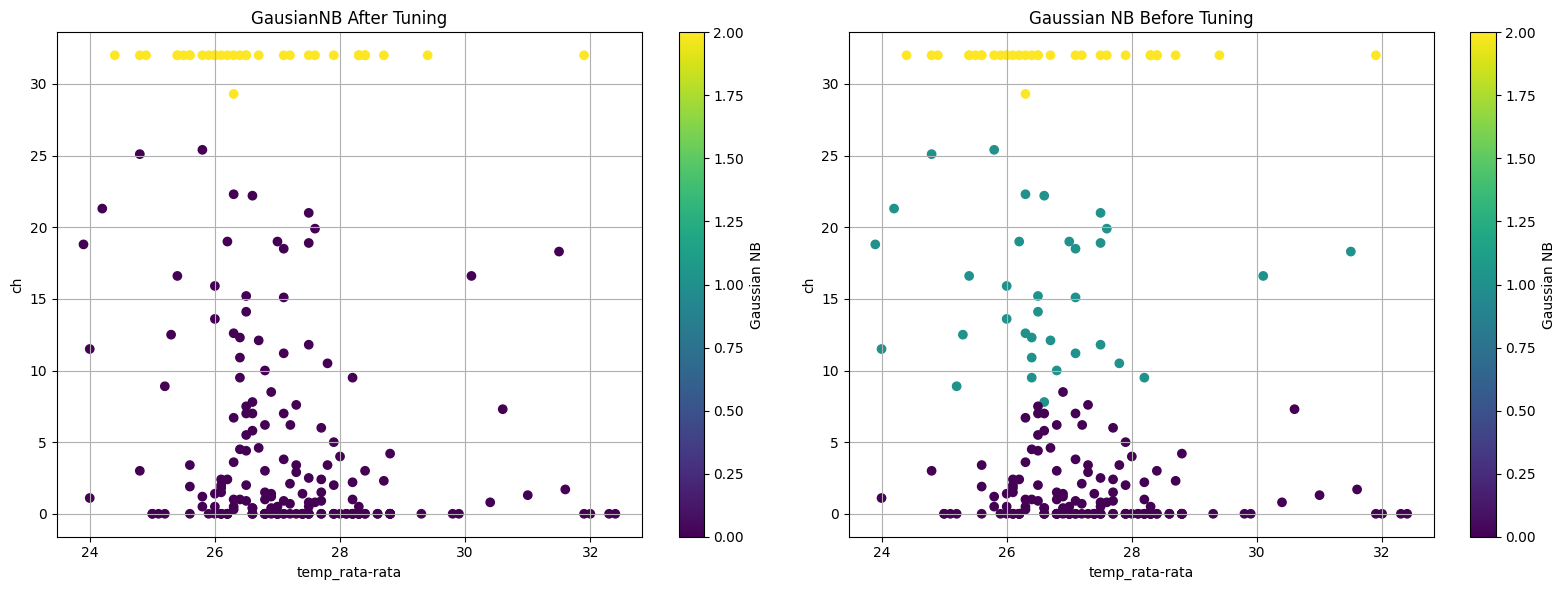

In [2545]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(combined_data['temp_rata-rata'], combined_data['ch'], c=combined_data["gnb_col_new"], cmap='viridis')
axes[0].set_xlabel('temp_rata-rata')
axes[0].set_ylabel('ch')
axes[0].set_title('GausianNB After Tuning')
axes[0].grid(True)
fig.colorbar(axes[0].collections[0], ax=axes[0], label='Gaussian NB')

axes[1].scatter(combined_data['temp_rata-rata'], combined_data['ch'], c=combined_data["gnb_prediction"], cmap='viridis')
axes[1].set_xlabel('temp_rata-rata')
axes[1].set_ylabel('ch')
axes[1].set_title('Gaussian NB Before Tuning')
axes[1].grid(True)
fig.colorbar(axes[1].collections[0], ax=axes[1], label='Gaussian NB')

plt.tight_layout()
plt.show()

##**Kesimpulan**

Dari evaluasi model di atas, kita dapat mengetahui bahwa metode Gaussian Naive Bayes dan Decision Tree adalah metode klasifikasi terbaik. Sementara itu, klustering K-Means menunjukkan hasil yang lebih baik daripada metode clustering hierikal. Dan setelah melakukan tunnning hyperparameter, kami menemukan bahwa metode clustering hierikal harus dimodelkan ulang dengan menggunakan hyperparameter yang lebih baik dari sebelumnya, yang didasarkan pada skor Silhouette dari kombinasi hyperparameter.